WILDLIFE IMAGE CLASSIFICATION USING DEEP LEARNING TECHNIQUES

Image Classification using Densenet

In [ ]:
a = []
while(1):
    a.append('1')

Code for connecting Colab to Google Drive

In [ ]:
#!pip install -U -q PyDrive
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials

In [ ]:
#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)

In [ ]:
#from google.colab import drive
#drive.mount('/wildlife')

Importing all the required libraries

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.layers import Dropout
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras.models import Model
from keras.applications.densenet import DenseNet121
from keras.applications.densenet import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os
from keras.utils import plot_model
from keras.models import load_model
from keras.applications.densenet import preprocess_input
import tensorflow as tf

Using TensorFlow backend.


**Exploratory data Analysis**

In [ ]:
# for getting number of classes
folders = glob('/content/drive/My Drive/wildlife/Training/*')
folders


['/content/drive/My Drive/wildlife/Training/black_bear',
 '/content/drive/My Drive/wildlife/Training/canada_lynx',
 '/content/drive/My Drive/wildlife/Training/bobcat',
 '/content/drive/My Drive/wildlife/Training/bald_eagle',
 '/content/drive/My Drive/wildlife/Training/deer']

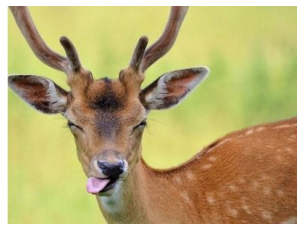

In [ ]:
from skimage.io import imread
img = imread('/content/drive/My Drive/wildlife/Training/deer/0086a3b72f62599ad6.jpg')

plt.imshow(img)
plt.axis('off')
plt.show()

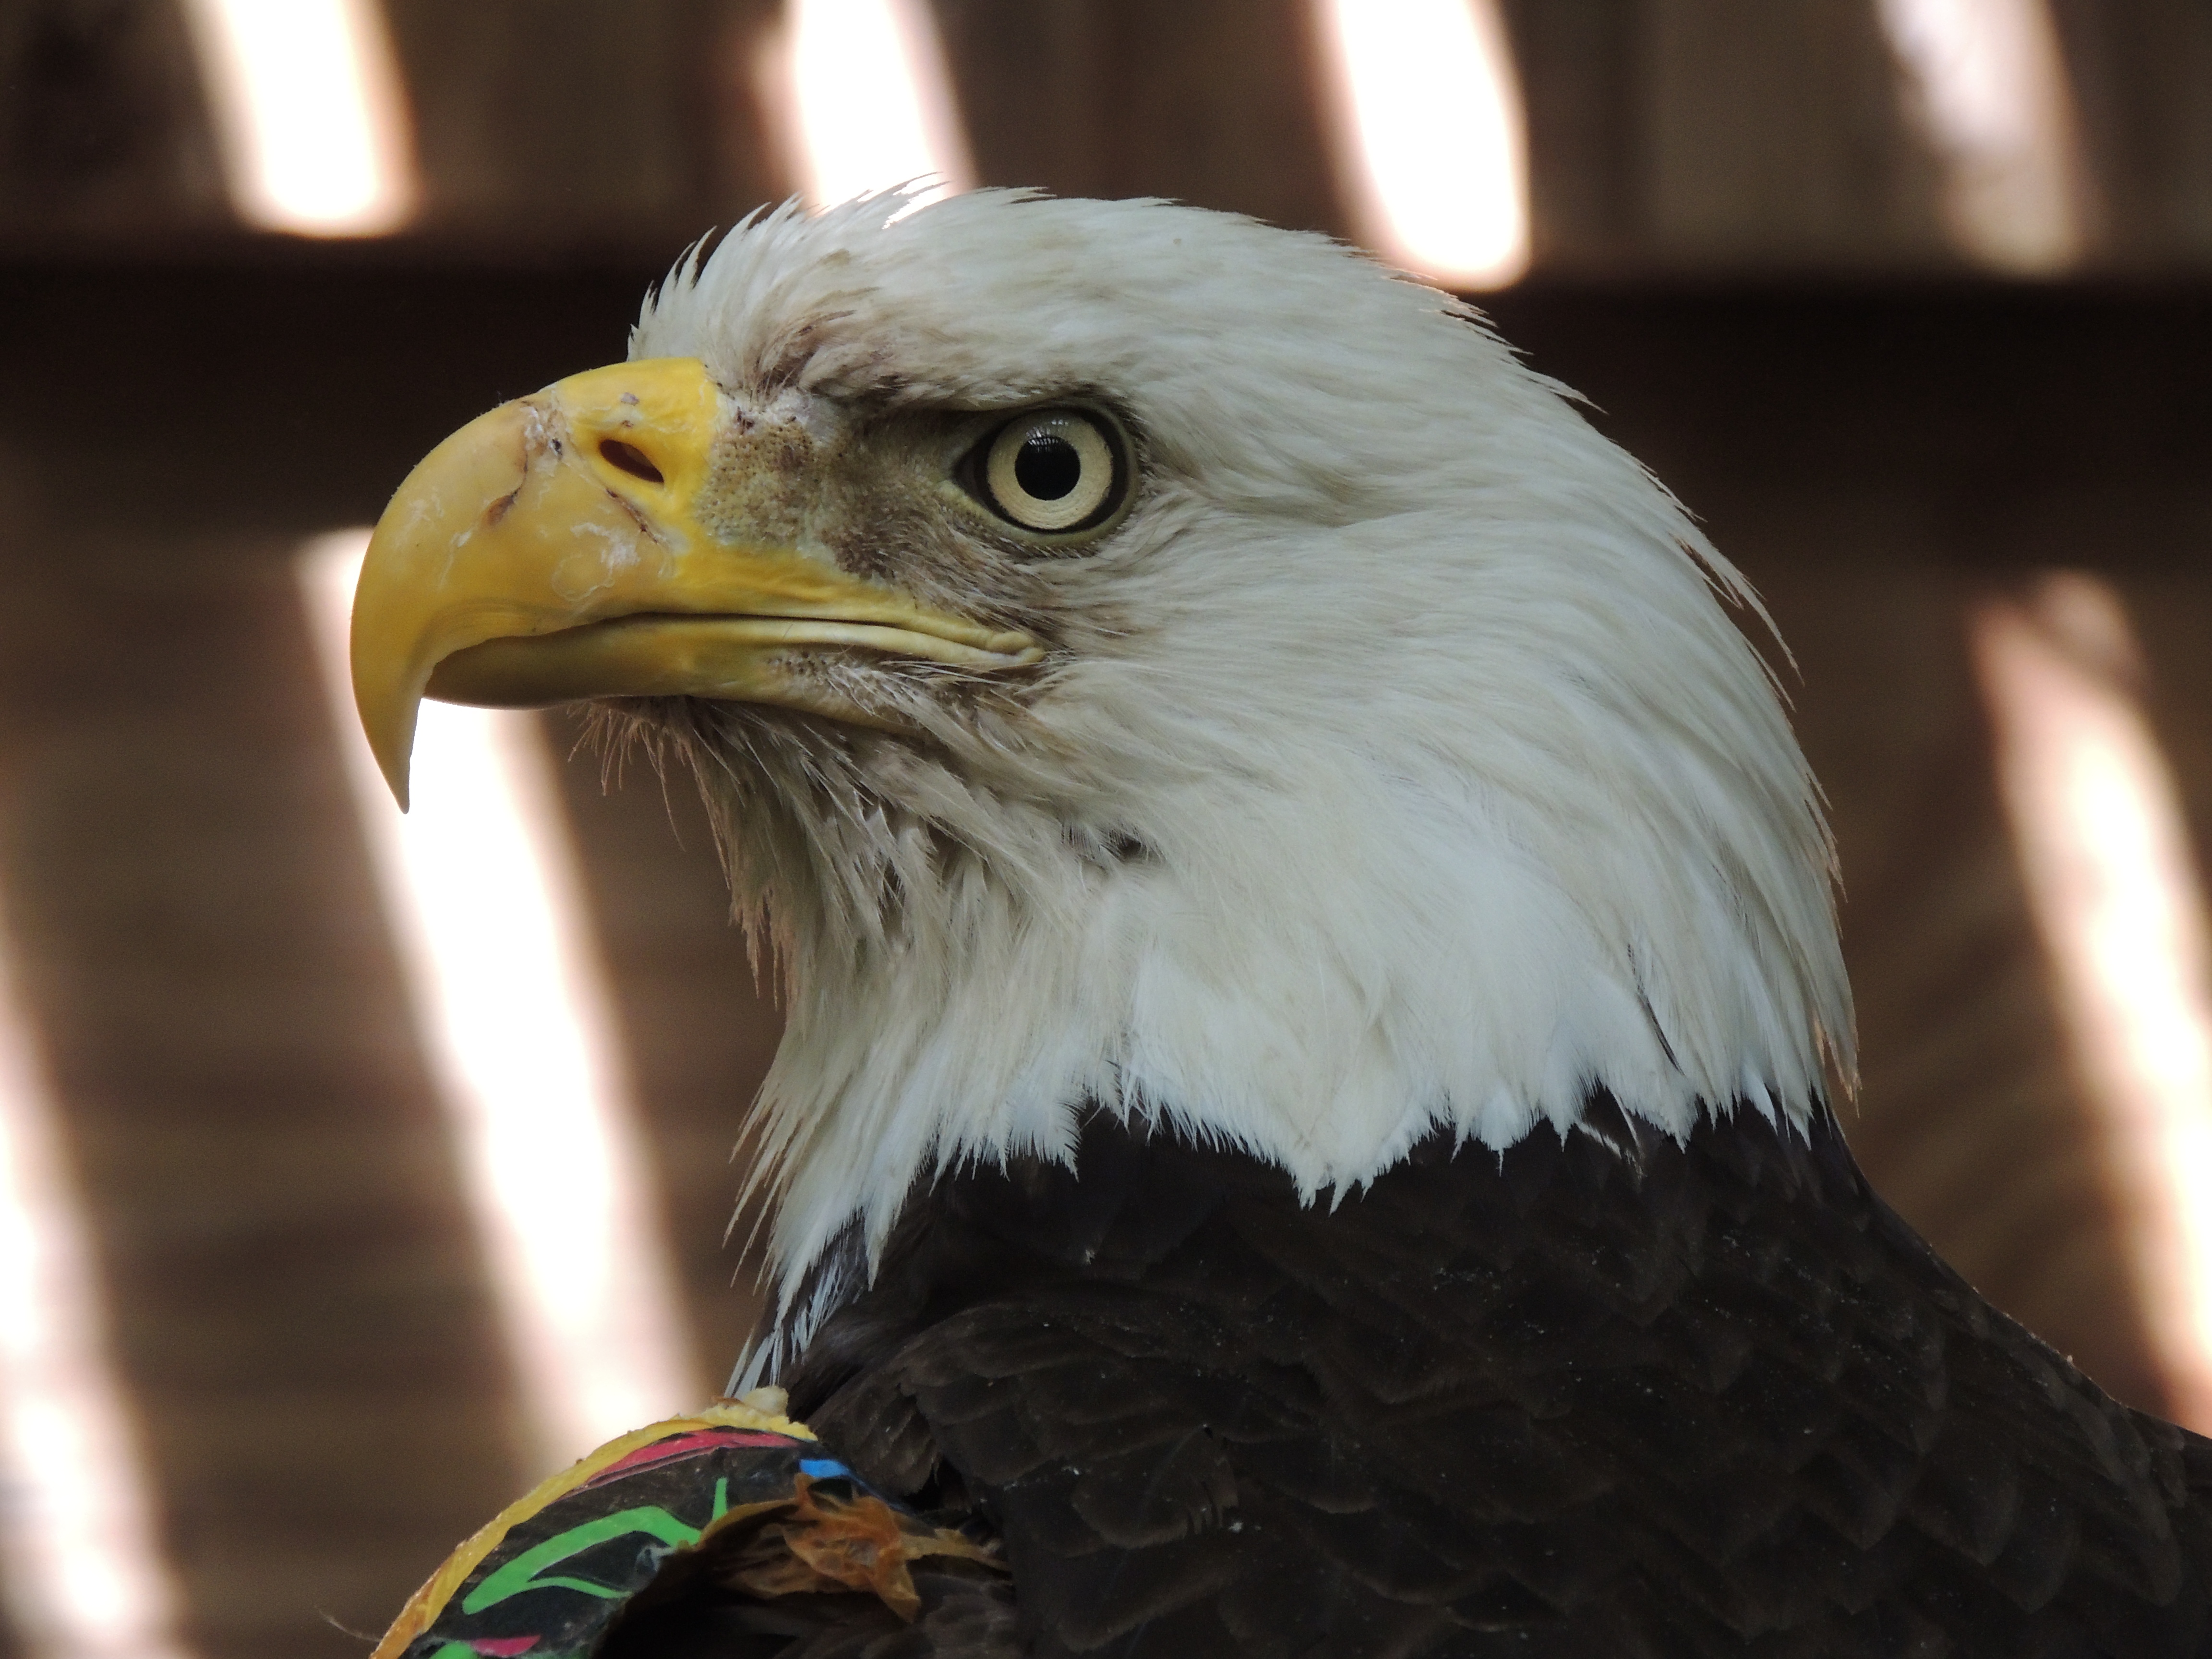

In [ ]:
from IPython.display import Image, display
Image('/content/drive/My Drive/wildlife/Training/bald_eagle/00e148aeea989ba56b.JPG')

In [ ]:
data_set = '/content/drive/My Drive/wildlife'

labels = os.listdir(data_set)
print("Number of Labels:", len(labels))

total = 0
for lb in os.scandir(data_set):
    print('folder: {} images: {}'.format(lb.name, len(os.listdir(lb))))
    total += len(os.listdir(lb))
print('Total images:', total)

Number of Labels: 2
folder: Training images: 5
folder: Test images: 5
Total images: 10


In [ ]:
data_set = '/content/drive/My Drive/wildlife/Training'

labels = os.listdir(data_set)
print("Number of Labels:", len(labels))

total = 0
for lb in os.scandir(data_set):
    print('folder: {} images: {}'.format(lb.name, len(os.listdir(lb))))
    total += len(os.listdir(lb))
print('Total images:', total)

Number of Labels: 5
folder: black_bear images: 585
folder: canada_lynx images: 574
folder: bobcat images: 567
folder: bald_eagle images: 599
folder: deer images: 611
Total images: 2936


In [ ]:
data_set = '/content/drive/My Drive/wildlife/Test'

labels = os.listdir(data_set)
print("Number of Labels:", len(labels))

total = 0
for lb in os.scandir(data_set):
    print('folder: {} images: {}'.format(lb.name, len(os.listdir(lb))))
    total += len(os.listdir(lb))
print('Total images:', total)

Number of Labels: 5
folder: bobcat images: 139
folder: black_bear images: 143
folder: deer images: 153
folder: canada_lynx images: 143
folder: bald_eagle images: 149
Total images: 727


**Initialisation of Densenet**

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/wildlife/Training'
valid_path = '/content/drive/My Drive/wildlife/Test'

# add preprocessing layer to the front of DenseNet
den = DenseNet121(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in den.layers:
  layer.trainable = False

29089792/29084464 [==============================] - 0s 0us/step


In [ ]:
# our layer
x = Flatten()(den.output)
prediction = Dense(len(folders), activation='softmax',  kernel_regularizer=regularizers.l2(0.0001))(x)  #using L2 regularizer to avoid overfitting.


In [ ]:
# create a model object
model = Model(inputs=den.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
# compiling the model with cost and optimization method
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Data Augmentation before fitting our model
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/wildlife/Training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/wildlife/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2925 images belonging to 5 classes.
Found 724 images belonging to 5 classes.


In [ ]:
# fitting the model
result = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set))

Epoch 1/10
42/92 [============>.................] - ETA: 16:47 - loss: 2.9413 - accuracy: 0.7418

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


57/92 [=================>............] - ETA: 11:28 - loss: 2.3720 - accuracy: 0.7867

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 37 could not be retrieved. It could be because a worker has died.
  UserWarning)


92/92 [==============================] - 1998s 22s/step - loss: 1.7379 - accuracy: 0.8366 - val_loss: 1.1333 - val_accuracy: 0.8564
Epoch 2/10
92/92 [==============================] - 103s 1s/step - loss: 0.3876 - accuracy: 0.9515 - val_loss: 1.9787 - val_accuracy: 0.8964
Epoch 3/10
92/92 [==============================] - 108s 1s/step - loss: 0.3477 - accuracy: 0.9474 - val_loss: 0.4686 - val_accuracy: 0.8729
Epoch 4/10
92/92 [==============================] - 106s 1s/step - loss: 0.2976 - accuracy: 0.9583 - val_loss: 0.9240 - val_accuracy: 0.9378
Epoch 5/10
92/92 [==============================] - 106s 1s/step - loss: 0.4365 - accuracy: 0.9497 - val_loss: 0.3439 - val_accuracy: 0.9309
Epoch 6/10
92/92 [==============================] - 107s 1s/step - loss: 0.2871 - accuracy: 0.9648 - val_loss: 0.2558 - val_accuracy: 0.8826
Epoch 7/10
92/92 [==============================] - 106s 1s/step - loss: 0.2513 - accuracy: 0.9720 - val_loss: 1.5488 - val_accuracy: 0.9296
Epoch 8/10
92/92 [====

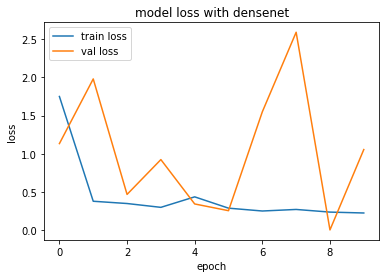

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.legend()
plt.title('model loss with densenet')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
plt.savefig('LossVal_loss')

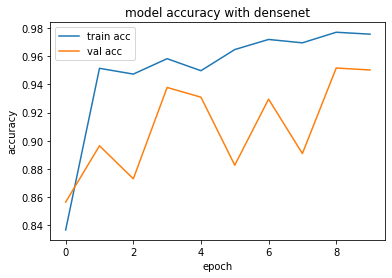

<Figure size 432x288 with 0 Axes>

In [ ]:
# accuracies
plt.plot(result.history['accuracy'], label='train acc')
plt.plot(result.history['val_accuracy'], label='val acc')
plt.title('model accuracy with densenet')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
#Saving our model
model.save('densenet_model.h5')

In [ ]:
## Predicitng Models
model = load_model('densenet_model.h5')
img = image.load_img('/content/drive/My Drive/wildlife/Test/deer/cac897d1b08f1fc615.JPG', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)

In [ ]:
classes

array([[0., 0., 0., 0., 1.]], dtype=float32)

The image used was of a deer which was our 5th class. The model predict the fifth class as 1.

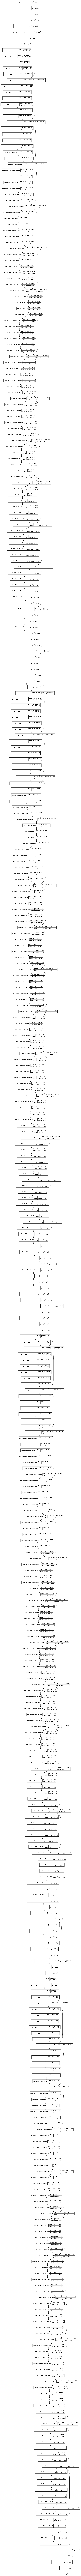

In [ ]:
#Plotting our model
plot_model(model, to_file='model.png', show_shapes=True, rankdir='TB', expand_nested=True)